In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [3]:
path = 'ASTROSFINAL.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,Friday,Jan,0,No Game,No game
1,2010-01-02,13,Saturday,Jan,14,No Game,No game
2,2010-01-03,12,Sunday,Jan,0,No Game,No game
3,2010-01-04,9,Monday,Jan,14,No Game,No game
4,2010-01-05,8,Tuesday,Jan,2,No Game,No game


# separate
- all
- game 
- no game

In [7]:
no_game = df.game == 'No Game'
gc = df[~no_game]
nc = df[no_game]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


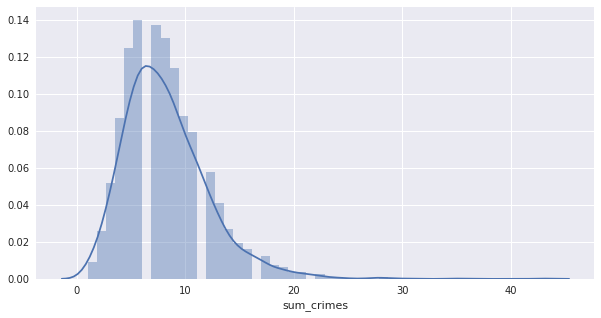

In [9]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(df['sum_crimes'])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


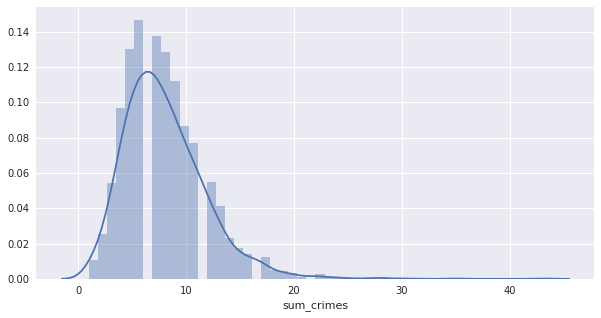

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(nc['sum_crimes'])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


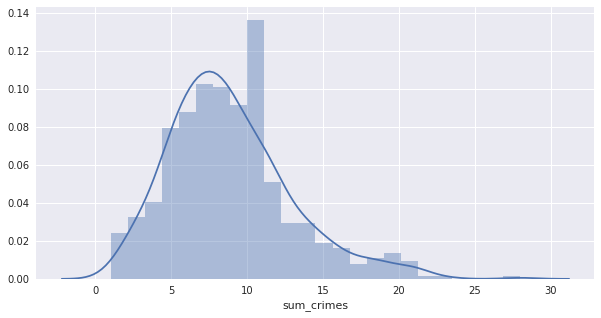

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(gc['sum_crimes'])

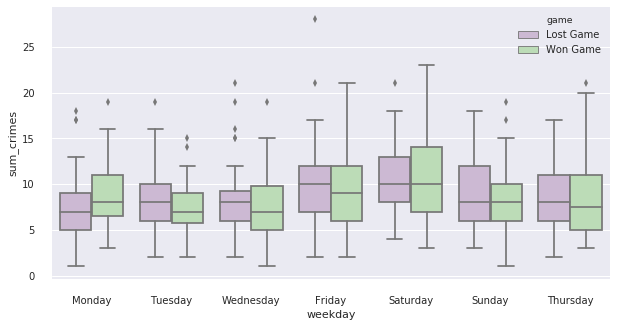

In [15]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="sum_crimes", hue="game", data=gc, palette="PRGn")
sns.despine(offset=10, trim=True)

In [18]:
dft = df.copy()

## Beter than average

In [21]:
df['sum_crimes'].mean()

8.214946863215632

In [22]:
nc['sum_crimes'].mean()

8.029659141212926

In [23]:
gc['sum_crimes'].mean()

8.851063829787234

# TEST
1. get_dummies
2. encoder

for all games vs no games

In [20]:
encoder = preprocessing.LabelEncoder()
dft["weekday"] = encoder.fit_transform(dft["weekday"].fillna('Nan'))
dft["month"] = encoder.fit_transform(dft["month"].fillna('Nan'))
dft["game"] = encoder.fit_transform(dft["game"].fillna('Nan'))
dft["seasons"] = encoder.fit_transform(dft["seasons"].fillna('Nan'))

dft.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,0,4,0,1,0
1,2010-01-02,13,2,4,14,1,0
2,2010-01-03,12,3,4,0,1,0
3,2010-01-04,9,1,4,14,1,0
4,2010-01-05,8,5,4,2,1,0


## all ds

In [24]:
X = dft.drop('sum_crimes', axis=1)
y = dft['sum_crimes']

In [25]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ mode_hr',gc_enc).fit()
print(m.summary())